# Workspace for LOSC tutorials

This notebook provides a workspace to try introductory LOSC tutorials.  

* Find tutorials at: https://losc.ligo.org/tutorials/
* Ctrl + Enter to run a cell 
* Alt + Enter to run a cell and make a new one 
 * Or, use the "Cell" and "Insert" menus at the top

### Download LIGO Data

See how to find LIGO data here: https://losc.ligo.org/tutorial01/

Here, we'll use a few lines of python to download a data file.

In [1]:
#----------------------
# Import needed modules
#----------------------
import numpy as np
import matplotlib.pyplot as plt
import h5py
import readligo as rl
import urllib3
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
help(rl)

Help on module readligo:

NAME
    readligo - readligo.py

DESCRIPTION
    updated: January 15, 2018
    by: Agata Trovato
    what has been modified: minor corrections to make it usable with python 3 
    (tab replaced with spaces, argument of 'reshape' integer, forced the integer conversion also for slices)
    
    Version 0.3
    January 10, 2017
    Jonah Kanner, Roy Williams, and Alan Weinstein
    
    Updates in this version:
     * Should now work with both Python 2 and Python 3
    
    This module provides tools for reading LIGO data
    files.  Data along with supporting documentation
    can be downloaded from the losc web site:
    https://losc.ligo.org
    
    Some possible use cases are shown below.
    
    Example #0:
    To load all data from a single file:
    strain, time, dq = rl.loaddata('ligo_data/H-H1_LOSC_4_V1-842653696-4096.hdf5', 'H1')
    
    Example #1: 
    segList = getsegs(842657792, 842658792, 'H1')
    for (start, stop) in segList:
      strain, met

### A thing about https requests

**Update (2017-07-28):** If you're using a modern version of these libraries, they may no longer be vendored. If that's the case, then you'll only need to do:

```python
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
```
If you're still using a version of Requests which vendors urllib3 inside of it (like the original question), then you can use the original answer below:

Original answer:

The reason doing `urllib3.disable_warnings()` didn't work for you is because it looks like you're using a separate instance of urllib3 vendored inside of requests.

I gather this based on the path here: `/usr/lib/python2.6/site-packages/requests/packages/urllib3/connectionpool.py`

To disable warnings in requests' vendored urllib3, you'll need to import that specific instance of the module:

```python
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning

requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
```

In [8]:
! wget https://losc.ligo.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5

--2018-02-02 16:30:08--  https://losc.ligo.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5
Resolving losc.ligo.org... 131.215.125.132
Connecting to losc.ligo.org|131.215.125.132|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: https://losc.ligo.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5/ [following]
--2018-02-02 16:30:09--  https://losc.ligo.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5/
Reusing existing connection to losc.ligo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 95071329 (91M) [application/x-hdf]
Saving to: ‘H-H1_LOSC_4_V1-815411200-4096.hdf5’

H-H1_LOSC_4_V1-8154 100%[===================>]  90.67M  5.03MB/s    in 19s     

2018-02-02 16:30:28 (4.80 MB/s) - ‘H-H1_LOSC_4_V1-815411200-4096.hdf5’ saved [95071329/95071329]



In [9]:
# urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
# url = 'https://losc.ligo.org/archive/data/S5/814743552/H-H1_LOSC_4_V1-815411200-4096.hdf5'
# filename = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
# # r = urllib3.(url).read()
# http = urllib3.PoolManager()
# r = http.request('GET', url).read()
# f = open(filename, 'wb')   # write it to the right filename
# f.write(r)
# f.close()
# print("File download complete")
filename = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'

### Load data

In [10]:
# -- Read in the strain data
strain, time, channel_dict = rl.loaddata(filename)

# -- Identify segment of useable data
ts = time[1] - time[0]      #-- Time between samples
fs = int(1.0 / ts)          #-- Sampling frequency
segList = rl.dq_channel_to_seglist(channel_dict['DATA'], fs)
length = 16  # seconds
strain_seg = strain[segList[0]][0:(length*fs)]  #-- Identify a 16 s segment of data
time_seg = time[segList[0]][0:(length*fs)]      #-- Identify the corresponding time segment

### Plot the strain time-series

(0, 2)

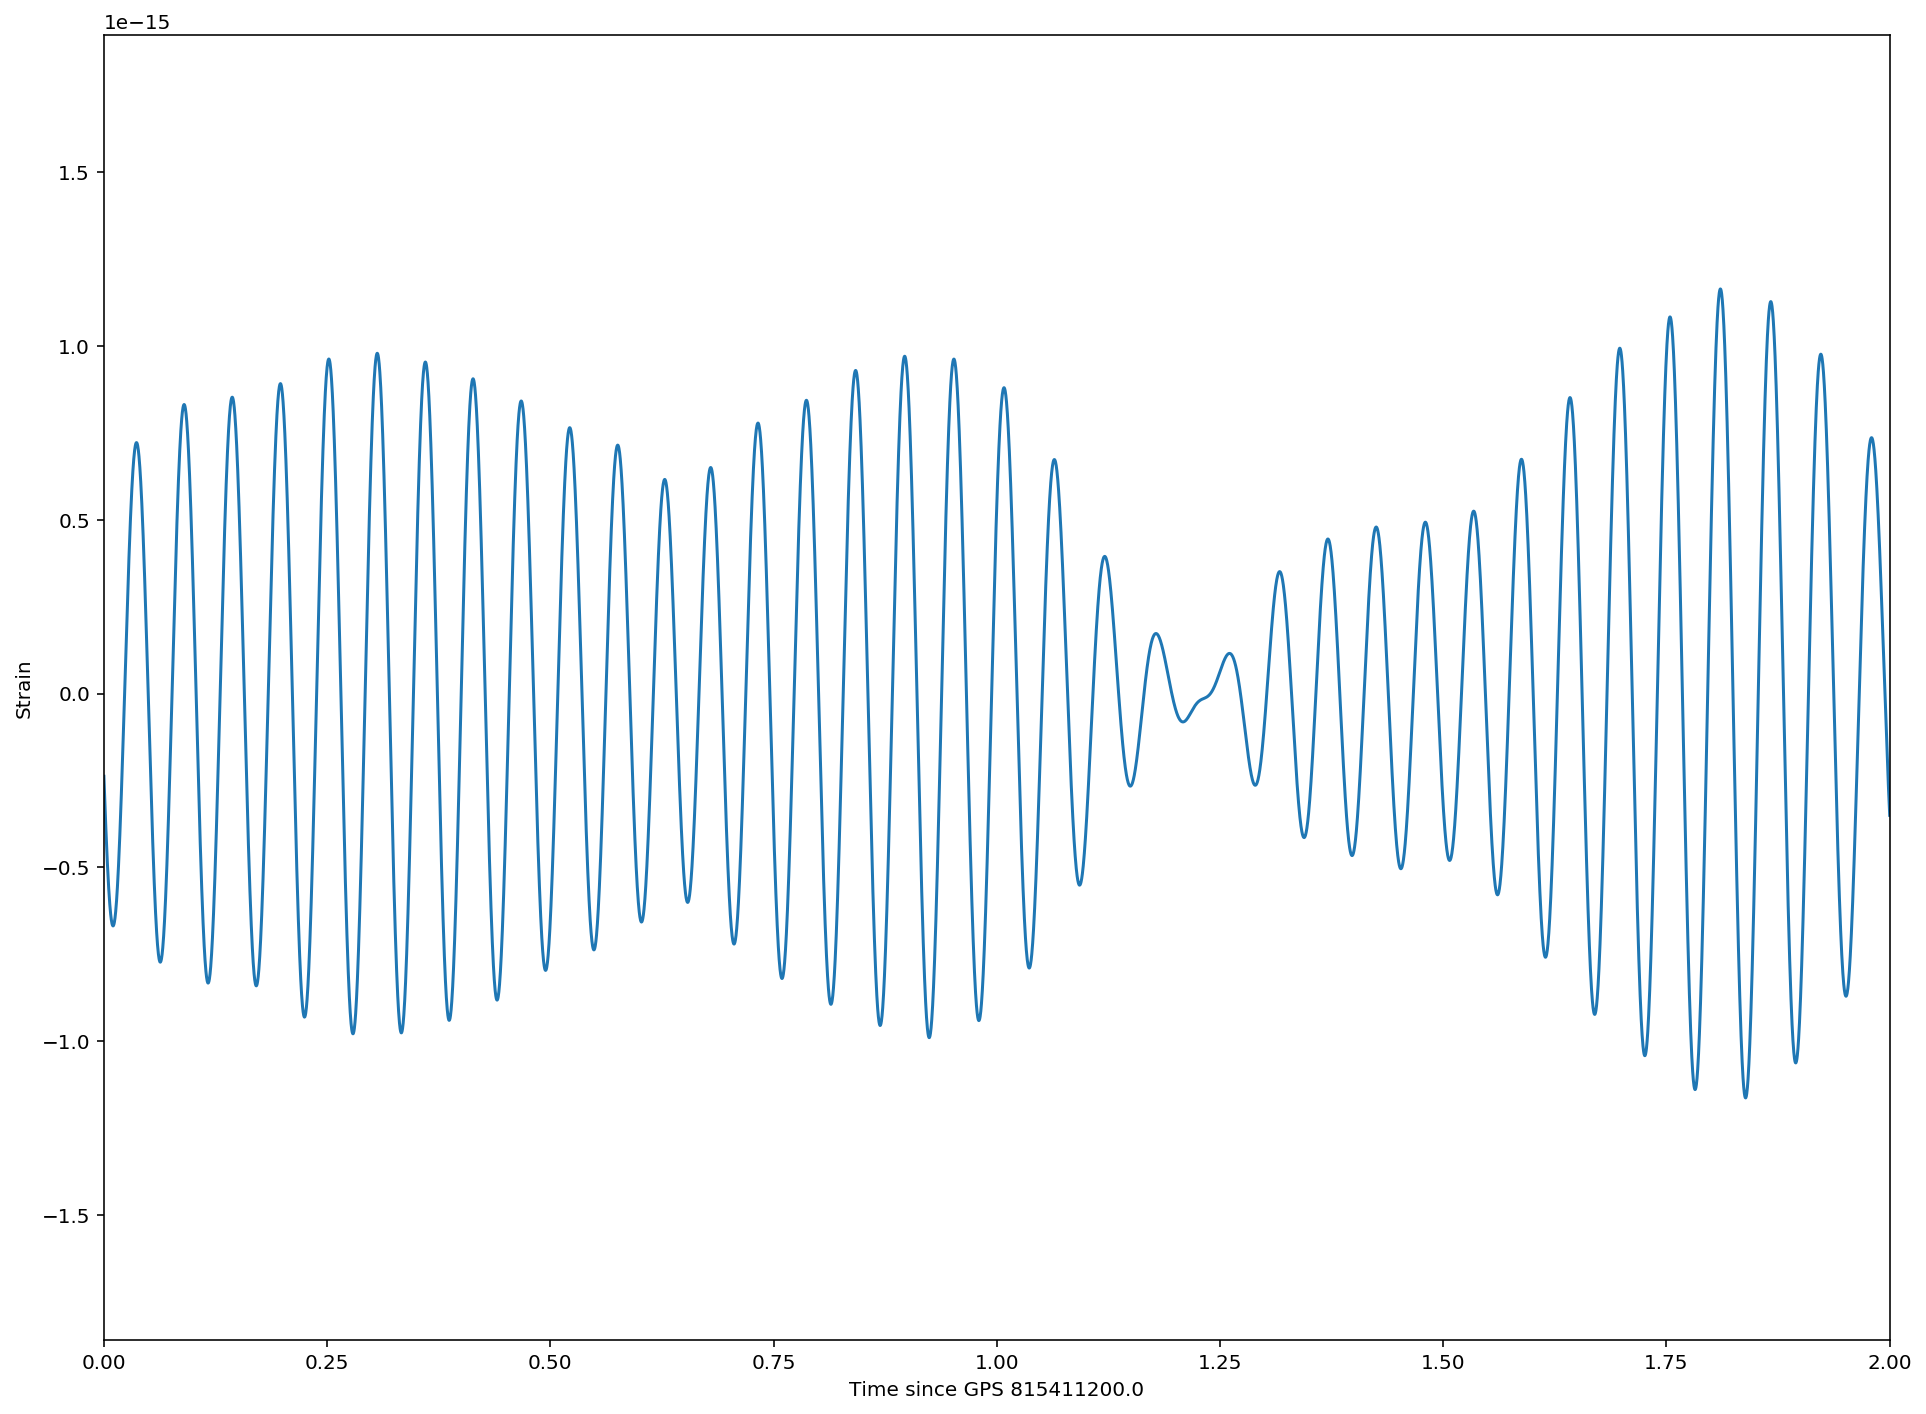

In [11]:
plt.figure(figsize=(16,12))
plt.plot(time_seg - time_seg[0], strain_seg)
plt.xlabel('Time since GPS ' + str(time_seg[0]))
plt.ylabel('Strain')
plt.xlim([0,2])

## More to try!
You can use this space to try other tutorials: https://losc.ligo.org/tutorials/

In [4]:
# Try adding some code here!  
# https://losc.ligo.org/tutorials/

In [5]:
# Add code here

In [6]:
# Add code here